# Projeto Final - Econometria 1
Lucas Rabay Butcher

In [1]:
''' importando bibliotecas necessárias '''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# Teste da classe autoral
from SimpleLinearRegression import SimpleLinearRegression

### **1 - Discriminação no Mercado de Trabalho**

Aqui analisaremos um conjunto de dados com informações sobre o salário e informações demográficas de alguns trabalhadores. As informações contidas nesse *dataset* são:

- **salario** : Valor do salário do indivíduo.
- **exp** : Anos de experiência no mercado de trabalho.
- **educ** : Anos de educação formal do indivíduo.
- **homem** : variável binária (dummy), que indica se o indivíduo é ou não do sexo masculino.

In [3]:
'''' Carregando os dados e conferindo '''
salarios_df = pd.read_csv('data/salario_mercado.csv')
salarios_df

,salario,exp,educ,homem
0,3.333333,5,5.0,1
1,6.000000,10,12.0,1
2,146.666667,16,12.0,1
3,53.333333,18,12.0,1
4,133.333333,20,14.0,0
...,...,...,...,...
5248,200.000000,48,12.0,1
5249,66.666667,6,13.0,1
5250,400.000000,48,9.0,0
5251,280.000000,44,7.0,0


In [4]:
''' Checando Valores Nulos '''
salarios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5253 entries, 0 to 5252
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   salario  5253 non-null   float64
 1   exp      5253 non-null   int64  
 2   educ     5249 non-null   float64
 3   homem    5253 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 164.3 KB


In [5]:
'''Definindo valores nulos para educ como 0'''
salarios_df['educ'] = salarios_df['educ'].fillna(0)

#### **1.1** Vamos rodar agora uma especificação básica de uma Equação de *Mincer*. Definida por:

$$\ln(\text{salario}) = \beta_0 + \beta_1 \cdot \text{educ} + \beta_2 \cdot \text{homem} + \epsilon$$

Onde:

$$1. \ln(\text{salario})$$

É o logaritmo natural do salário. A utilização do logaritmo natural permite linearizar a relação entre os salários e as variáveis independentes, facilitando a interpretação dos coeficientes como mudanças percentuais.

$$2. \beta_0$$

É o intercepto da equação. Representa o valor esperado da função quando todas as variáveis independentes (educ e homem) são iguais a zero.

$$3. \beta_1$$

Representa a variação no logaritmo do salário associada a um aumento de uma unidade na variável **educ** (anos de escolaridade).

$$4. \beta_2$$

Indica a diferença no logaritmo do salário entre homens e mulheres.

$$5. \epsilon$$

Representada a parte não observada da função salário, ou o erro aleatório.


In [6]:
''' Adicionando a coluna log_salario, para melhor analisar '''
salarios_df['log_salario'] = np.log(salarios_df['salario'])

In [7]:
''' Definindo variáveis independentes e intercepto '''
X = salarios_df[['educ', 'homem']]
X = sm.add_constant(X)

''' Definindo variável dependente '''
y = salarios_df['log_salario']

''' Rodando modelo '''
model = sm.OLS(y, X).fit()

#### **1.2** Interpretando resultados

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_salario   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     449.9
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          4.40e-181
Time:                        12:13:07   Log-Likelihood:                -6611.5
No. Observations:                5253   AIC:                         1.323e+04
Df Residuals:                    5250   BIC:                         1.325e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9378      0.045    110.833      0.000       4.850       5.025
educ           0.0994      0.003     29.971      0.000       0.093       0.106
homem         -0.0330      0.024     -1.404      0.160      -0.079       0.013
==============================================================================
Omnibus:                      781.734   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1493.771
Skew:                          -0.930   Prob(JB):                         0.00
Kurtosis:                       4.834   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


##### *Resposta da 1.2*

**1. B_1 = 0,0994** - Este resultado indica que a cada alteração unitária em educ, ou seja a cada ano de educação a mais, há um aumento de 9,94% no salário dos individuos. Obtendo assim um resultado esperado, em que a educação influencia positivamente na remuneração do profissional. 

**2. B_2 = -0,33** - Resultado bastante surpreendente, que indica que homens tendem a ganahr aproximadamente -3,3% do que as mulheres, mantendo nível de educação constante. No entanto, observamos que o P-valor de 0,160 indica que esse resultado não é estatisticamente significante

**3 R^2 = 0.146** - Porém, observamos que nosso modelo representa apenas 14% da composição de ln(salario), ou seja, muitos outros fatores estão de fora do modelo.

### **2 - Taxa de glicose e incidência de Diabetes**

Nesta parte, será analisado um conjunto de dados com informações de saúde de uma determinada
população, como parte de um estudo para prever diabetes em mulheres adultas (com 21 anos ou mais).
As seguintes variáveis estão incluídas nos banco diabetes_dados.csv :

- **n_gravidez** : Número de vezes que a pessoa ficou grávida
- **glicose** : Concentração de glicose plasmática 2 horas após um teste oral de tolerância à glicose
- **pressao_arterial** : Pressão arterial diastólica (mm Hg)
- **insulina** : Nível de insulina sérica após 2 horas (mu U/ml)
- **imc** : Índice de massa corporal (peso em kg/(altura em m)2)
- **idade** : Idade (anos)
- **diabetes** : Variável de dummy (0 = sem diabetes ou 1 = com diabetes)
  
1. Apresente uma tabela descritiva de dados contendo média e desvio padrão para cada variável
2. Faça um gráfico relacionando idade e o nível de glicose. Em seguida, relacione pressão arterial e o
IMC. Quais conclusões podemos tirar dessas relações?
3. Agora, estime um modelo de regressão para as duas relações anteriores. Discuta detalhadamente
os resultados dos estimadores e as conclusões obtidas. Para os dois casos, construa o intervalo de
confiança a 95% utilizando a função confint() e discuta os resultados.
4. Visualize o modelo estimado através da adição da reta de ajuste ao gráfico de dispersão plotado
anteriormente.
5. Temos uma variável chamada n_gravidez , que fornece o número de gestações anteriores. Crie
uma variável dummy chamada d_gravidez : qualquer mulher com 1 ou mais gestações será
codificada como 1; e qualquer mulher sem histórico de gravidez será codificada como 0.
6. Agora rode o modelo com o nível de glicose como variável dependente e idade e a dummy de gravidez
como variáveis independentes. Como podemos interpretar os coeficientes e quais conclusões
podemos tirar do resultado da estimação?



In [32]:
"""Import Modules"""
#Math
import numpy as np
#Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, DataFrame
#Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

#### **Leitura dos Dados**

In [9]:
file_path = 'data/diabetes_dados.csv'

df_diabetes = read_csv(file_path)
df_diabetes.head()

,n_gravidez,glicose,pressao_arterial,insulina,imc,idade,diabetes
0,6,148,72,0,33.6,50,1
1,1,85,66,0,26.6,31,0
2,8,183,64,0,23.3,32,1
3,1,89,66,94,28.1,21,0
4,0,137,40,168,43.1,33,1


#### **Informações Gerais**

In [10]:
print("Schema dos dados\n")
df_diabetes.info()

Schema dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   n_gravidez        768 non-null    int64  
 1   glicose           768 non-null    int64  
 2   pressao_arterial  768 non-null    int64  
 3   insulina          768 non-null    int64  
 4   imc               768 non-null    float64
 5   idade             768 non-null    int64  
 6   diabetes          768 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 42.1 KB


In [11]:
"""Descrição Estatística dos Dados"""
df_diabetes.select_dtypes(include=['float64', 'int64']).describe()

,n_gravidez,glicose,pressao_arterial,insulina,imc,idade,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,33.240885,0.348958
std,3.369578,31.972618,19.355807,115.244002,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,81.000000,1.000000


### **Relações**

* ``Idade`` x ``Nível de Glicose``. 
* ``Pressão Arterial`` x ``IMC``.

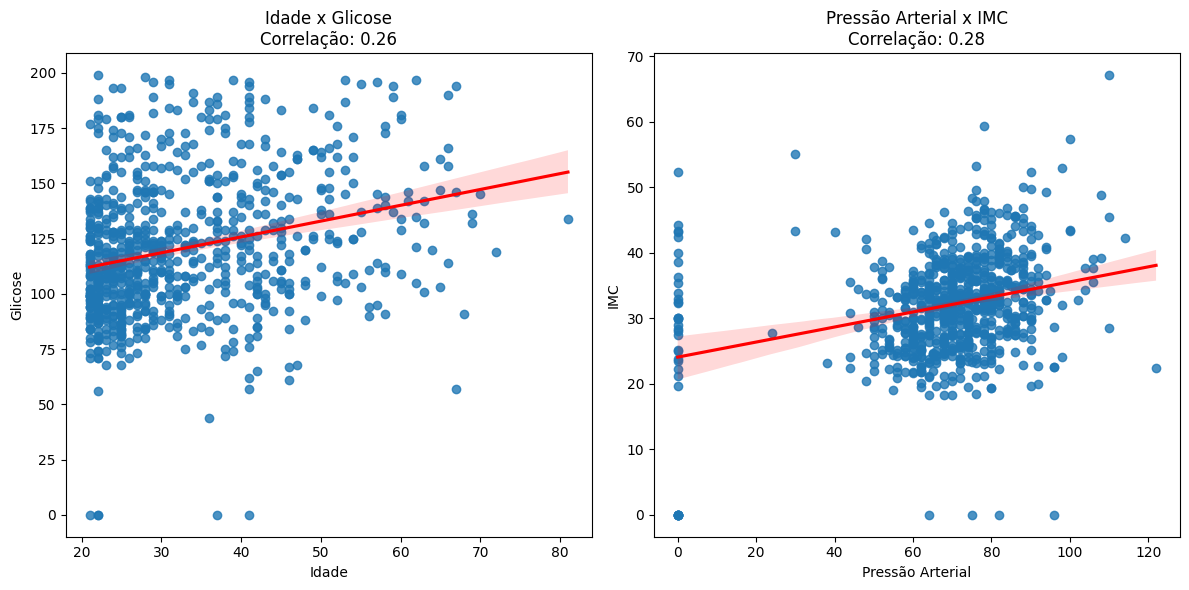

In [12]:
"""Correlação entre as variáveis"""

# Idade x Glicose
idade_glicose_corr = df_diabetes['idade'].corr(df_diabetes['glicose'])
# Pressão Arterial x IMC
pressao_IMC = df_diabetes['pressao_arterial'].corr(df_diabetes['imc'])

# Gráfico Idade x Glicose 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.regplot(x='idade', y='glicose', data=df_diabetes, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title(f'Idade x Glicose\nCorrelação: {idade_glicose_corr:.2f}')
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Glicose')
# Gráifco Pressão Arterial x IMC
sns.regplot(x='pressao_arterial', y='imc', data=df_diabetes, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title(f'Pressão Arterial x IMC\nCorrelação: {pressao_IMC:.2f}')
ax[1].set_xlabel('Pressão Arterial')
ax[1].set_ylabel('IMC')

plt.tight_layout()
plt.show()

## **Modelagem**

`Idade` x `Glicose`

In [28]:
# Idade x Glicose
X_idade = sm.add_constant(df_diabetes['idade'])  # Adiciona uma constante ao modelo
model_idade = sm.OLS(df_diabetes['glicose'], X_idade).fit()


sumary = model_idade.summary()

# Intervalo de Confiança
conf_int_idade = model_idade.conf_int(alpha=0.05)
print("Intervalos de Confiança para Idade e Glicose:")
print(conf_int_idade)

Intervalos de Confiança para Idade e Glicose:
              0           1
const  90.52166  103.638658
idade   0.53040    0.902436


In [29]:
#Sumário do Modelo
print(sumary)

                            OLS Regression Results                            
Dep. Variable:                glicose   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     57.16
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.15e-13
Time:                        16:00:20   Log-Likelihood:                -3722.6
No. Observations:                 768   AIC:                             7449.
Df Residuals:                     766   BIC:                             7459.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.0802      3.341     29.058      0.0

### Análise dos Resultados

1. **R²**: `0.069`
   - Esse valor indica que aproximadamente 6,9% da variabilidade nos níveis de glicose pode ser explicada pela idade. O fato do valor ser baixo é um forte indicativo para excluir a idade como boa preditora para glicose.

2. **Estatística-F**: `57.16` e `Prob (F-statistic)`: `1.15e-13`
   - Como o p-valor foi muito baixo (menor que 0,05) sugere que a idade é estatisticamente significativa para explicar a variabilidade da variável dependente.

3. **Coeficientes**:
   - **Intercepto**: `97.0802`
     - Isso indica que quando a idade é zero, o nível de glicose esperado é aproximadamente 97,08 mg/dL. Embora essa interpretação não faça sentido prático (já que a idade não pode ser zero), ela serve como um ponto de referência para o modelo.
   - **idade**: `0.7164`
     - Para cada aumento de um ano na idade, o nível de glicose esperado aumenta em aproximadamente 0,7164 mg/dL. Este coeficiente é positivo e estatisticamente significativo, com um p-valor de 0,000, o que significa que a idade tem um efeito positivo e significativo nos níveis de glicose.

In [16]:
#Distribuição do estimador
X = df_diabetes['idade']
y = df_diabetes['glicose']
model_1 = LinearRegression()
model_1.fit(X.values.reshape(-1, 1), y.values)

bootstrap_coefs = []
bootstrap_intercepts = []

for i in range(100_000):
    bootstrap_sample = df_diabetes.sample(frac=0.1, replace=True)
    X = bootstrap_sample['idade']
    y = bootstrap_sample['glicose']
    model = LinearRegression()
    model.fit(X.values.reshape(-1, 1), y.values)
    coef = model.coef_[0]
    intercept = model.intercept_
    bootstrap_coefs.append(coef)
    bootstrap_intercepts.append(intercept)

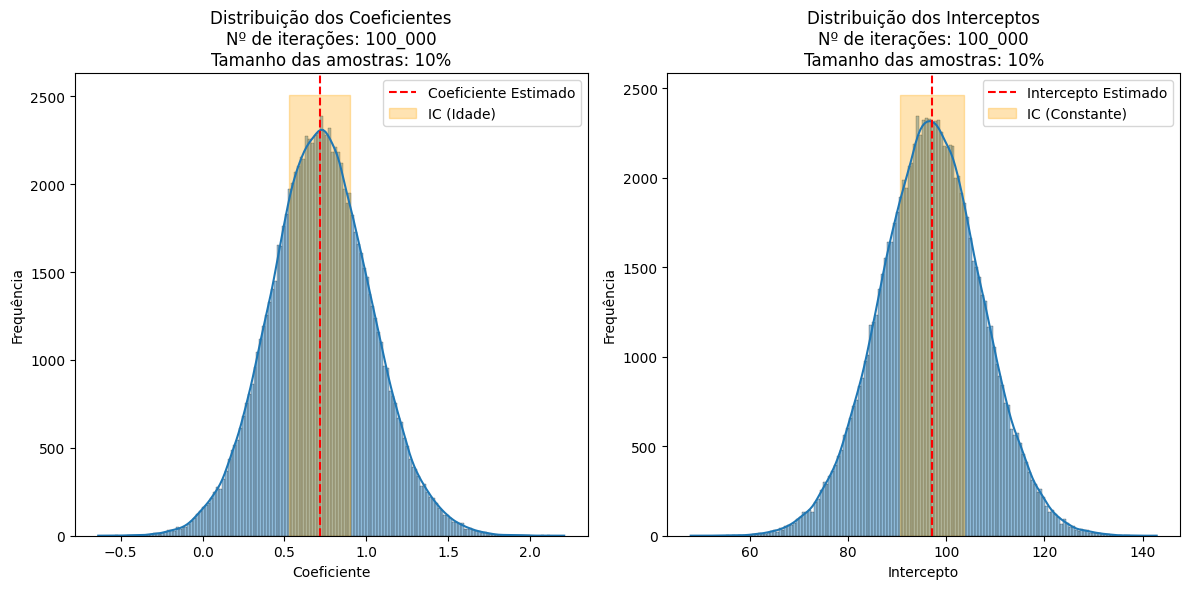

In [40]:
#Intervalos de Confiança
ci_intercept = [90.522, 103.639]
ci_idade = [0.530, 0.902]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#Distribuição dos coeficientes
sns.histplot(bootstrap_coefs, ax=ax[0], kde=True)
# Linha do coeficiente real
coef_line = ax[0].axvline(x=model_1.coef_[0], color='red', linestyle='--', label='Coeficiente Estimado')
#Intervalo de confiança da idade
y_max = ax[0].get_ylim()[1]
ax[0].fill_betweenx(y=[0, y_max], x1=ci_idade[0], x2=ci_idade[1], color='orange', alpha=0.3, label='IC (Idade)')

ax[0].set_title('Distribuição dos Coeficientes\nNº de iterações: 100_000\nTamanho das amostras: 10%')
ax[0].set_xlabel('Coeficiente')
ax[0].set_ylabel('Frequência')
ax[0].legend() 

#Distribuição dos interceptos
sns.histplot(bootstrap_intercepts, ax=ax[1], kde=True)
#Linha do intercepto Estimado
intercept_line = ax[1].axvline(x=model_1.intercept_, color='red', linestyle='--', label='Intercepto Estimado')
#Intervalo de confiança da constante
y_max_intercept = ax[1].get_ylim()[1]
ax[1].fill_betweenx(y=[0, y_max_intercept], x1=ci_intercept[0], x2=ci_intercept[1], color='orange', alpha=0.3, label='IC (Constante)')

ax[1].set_title('Distribuição dos Interceptos\nNº de iterações: 100_000\nTamanho das amostras: 10%')
ax[1].set_xlabel('Intercepto')
ax[1].set_ylabel('Frequência')
ax[1].legend()

plt.tight_layout()
plt.show()

`Pressão Arterial` x `IMC`

In [42]:
#Pressão Arterial x IMC
X_pressao = sm.add_constant(df_diabetes['pressao_arterial']) 
model_pressao = sm.OLS(df_diabetes['imc'], X_pressao).fit()

summary_pressao = model_pressao.summary()

#Intervalos de confiança
conf_int_pressao = model_pressao.conf_int(alpha=0.05)
print("Intervalos de Confiança para Pressão Arterial e IMC:")
print(conf_int_pressao)

Intervalos de Confiança para Pressão Arterial e IMC:
                          0          1
const             22.070911  26.049405
pressao_arterial   0.087067   0.142507


In [43]:
#Sumário
print(summary_pressao)

                            OLS Regression Results                            
Dep. Variable:                    imc   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     66.08
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.74e-15
Time:                        16:14:39   Log-Likelihood:                -2643.3
No. Observations:                 768   AIC:                             5291.
Df Residuals:                     766   BIC:                             5300.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               24.0602      1.013  

### Análise dos Resultados 

### Estatísticas do Modelo

1. **R²**: 0.079
   - Esse valor indica que aproximadamente 7,9% da variação no IMC pode ser explicada pela pressão arterial. Isso indica que a pressão arterial tem uma relação fraca com o IMC.

2. **Estatística-F**: 66.08
   - O valor da estatística F é significativamente alto, com um valor de p menor que 0,05 (1.74e-15), o que indica que o modelo é estatisticamente significativo e que a pressão arterial é um preditor relevante do IMC.

### Coeficientes do Modelo

- **Intercepto**: 24.0602
  - Este é o valor estimado do IMC quando a pressão arterial é zero.

- **Pressão Arterial**: 0.1148
  - Este coeficiente indica que, para cada aumento de 1 mm Hg na pressão arterial, espera-se que o IMC aumente em média 0.1148 unidades.

In [45]:
#Distribuição dos estimadores
X = df_diabetes['pressao_arterial']
y = df_diabetes['imc']
model_2 = LinearRegression()
model_2.fit(X.values.reshape(-1, 1), y.values)

bootstrap_coefs_pressao = []
bootstrap_intercepts_pressao = []

for i in range(100_000):
    bootstrap_sample = df_diabetes.sample(frac=0.1, replace=True)
    X = bootstrap_sample['pressao_arterial']
    y = bootstrap_sample['imc']
    model = LinearRegression()
    model.fit(X.values.reshape(-1, 1), y.values)
    coef = model.coef_[0]
    intercept = model.intercept_
    bootstrap_coefs_pressao.append(coef)
    bootstrap_intercepts_pressao.append(intercept)

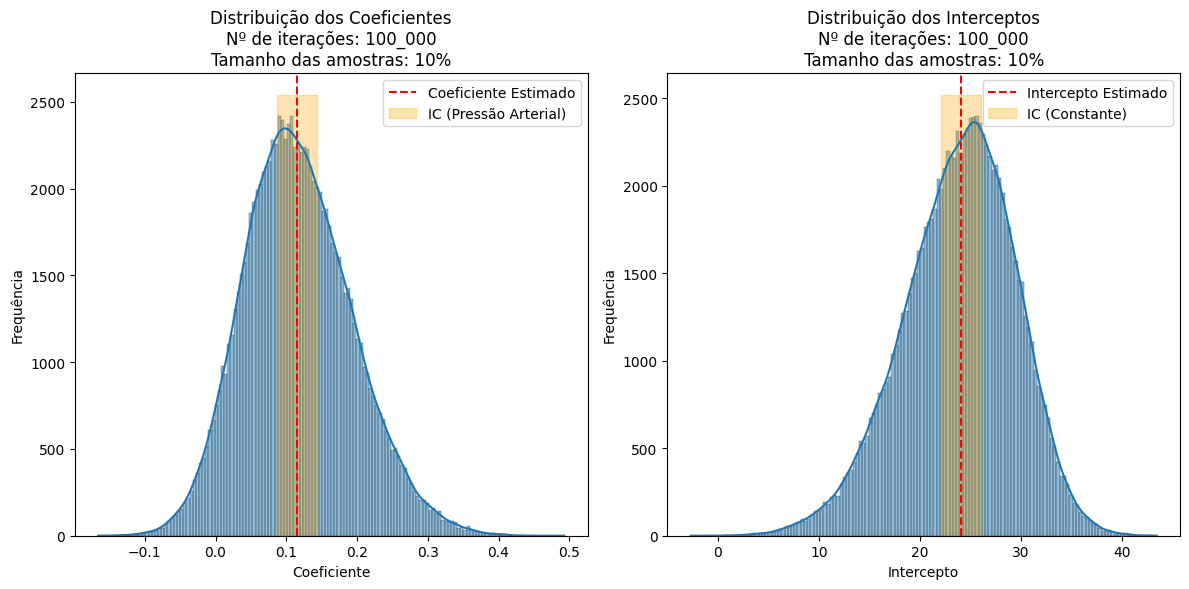

In [46]:
#Intervalos de Confiança
const_int_pressao = [22.071, 26.049]
coef_int_pressao = [0.087, 0.143]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#Distribuição dos coeficientes
sns.histplot(bootstrap_coefs_pressao, ax=ax[0], kde=True)
# Linha do coeficiente estimado
coef_line = ax[0].axvline(x=model_2.coef_[0], color='red', linestyle='--', label='Coeficiente Estimado')
#Intervalo de confiança
y_max = ax[0].get_ylim()[1]  # Obter o valor máximo do eixo y
ax[0].fill_betweenx(y=[0, y_max], x1=coef_int_pressao[0], x2=coef_int_pressao[1], color='orange', alpha=0.3, label='IC (Pressão Arterial)')
ax[0].set_title('Distribuição dos Coeficientes\nNº de iterações: 100_000\nTamanho das amostras: 10%')
ax[0].set_xlabel('Coeficiente')
ax[0].set_ylabel('Frequência')
ax[0].legend()

#Interceptos
sns.histplot(bootstrap_intercepts_pressao, ax=ax[1], kde=True)
#Linha do intercepto Estimado
intercept_line = ax[1].axvline(x=model_2.intercept_, color='red', linestyle='--', label='Intercepto Estimado')
#Intervalo de confiança
y_max_intercept = ax[1].get_ylim()[1]  # Obter o valor máximo do eixo y
ax[1].fill_betweenx(y=[0, y_max_intercept], x1=const_int_pressao[0], x2=const_int_pressao[1], color='orange', alpha=0.3, label='IC (Constante)')
ax[1].set_title('Distribuição dos Interceptos\nNº de iterações: 100_000\nTamanho das amostras: 10%')
ax[1].set_xlabel('Intercepto')
ax[1].set_ylabel('Frequência')
ax[1].legend()

plt.tight_layout()
plt.show()

## **Incluindo dummy**

5. Temos uma variável chamada n_gravidez , que fornece o número de gestações anteriores. Crie
uma variável dummy chamada d_gravidez : qualquer mulher com 1 ou mais gestações será
codificada como 1; e qualquer mulher sem histórico de gravidez será codificada como 0.
6. Agora rode o modelo com o nível de glicose como variável dependente e idade e a dummy de gravidez
como variáveis independentes. Como podemos interpretar os coeficientes e quais conclusões
podemos tirar do resultado da estimação?

In [48]:
#Incluindo dummy da gravidez
df_diabetes['d_gravidez'] = df_diabetes['n_gravidez'].apply(lambda x: 1 if x > 0 else 0)

df_diabetes[['n_gravidez', 'd_gravidez']].head()

,n_gravidez,d_gravidez
0,6,1
1,1,1
2,8,1
3,1,1
4,0,0


In [50]:
X = df_diabetes[['glicose', 'd_gravidez']]
Y = df_diabetes['idade']

X = sm.add_constant(X)
model_dummy = sm.OLS(Y, X).fit()

summary_dummy = model_dummy.summary()

#Intervalos de confiança
conf_int_dummy = model_dummy.conf_int(alpha=0.05)
print("Intervalos de Confiança para Glicose e Gravidez:")
print(conf_int_dummy)

Intervalos de Confiança para Glicose e Gravidez:
                    0          1
const       11.763753  19.098517
glicose      0.074342   0.123584
d_gravidez   4.596016   9.070517


In [51]:
#Sumário
print(summary_dummy)

                            OLS Regression Results                            
Dep. Variable:                  idade   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     47.86
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           2.61e-20
Time:                        16:24:56   Log-Likelihood:                -2936.9
No. Observations:                 768   AIC:                             5880.
Df Residuals:                     765   BIC:                             5894.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4311      1.868      8.260      0.0

### Análise dos Resultados

### Estatísticas do Modelo

1. **R²**: 0.111
   - Esse valor indica que aproximadamente 11,1% da variação na idade pode ser explicada pelo nível de glicose e pela variável dummy de gravidez.

2. **F-statistic**: 47.86
   - O valor da estatística F é significativamente alto, com um valor de p (Prob (F-statistic)) menor que 0,05 (2.61e-20), indicando que o modelo é estatisticamente significativo e que pelo menos uma das variáveis independentes é um preditor relevante da idade.

### Coeficientes do Modelo

- **Constante (Intercepto)**: 15.4311
  - Este é o valor estimado da idade quando tanto o nível de glicose quanto a dummy de gravidez são zero.

- **Glicose**: 0.0990
  - Este coeficiente indica que, para cada aumento de 1 unidade na concentração de glicose, espera-se que a idade aumente em média 0.0990 anos, mantendo a dummy de gravidez constante.

- **d_gravidez**: 6.8333
  - Este coeficiente indica que mulheres com uma ou mais gestações têm uma idade média estimada 6.8333 anos maior do que aquelas que não tiveram gestações, mantendo a glicose constante.